In [49]:
import os
import pandas as pd
from activity_count_function import *
from group_analysis_functions import *
from individual_analysis_ac_functions import *
from utilities import *
from individual_analysis_fs_functions import *
from gm_function import *

In [50]:
# PATHS
initial_path = '../CreateStudy'
# Constants related to thresholds
conventional_functional_space = 30
conventional_threshold_unilateral = 2  # Bailey and Lang, 2013
conventional_threshold_bilateral = 0  # Bailey and Lang, 2013
# Constants related to metric frequencies
frequency_GT = 50  # Hz
frequency_gm = 2   # Hz
frequency_gmac = 1  # Hz

In [51]:
# MODIFY HERE #  
testing_participant_id = 'H006'

In [52]:
# Load optimal H group parameters: AC threshold and FS 
optimal_H_AC_NDH, optimal_H_AC_DH = load_optimal_threshold(initial_path, participant_group='H', AC=True)
optimal_H_FS_NDH, optimal_H_FS_DH = load_optimal_threshold(initial_path, participant_group='H', AC=False)

Thresholds loaded successfully from: ../CreateStudy\H_optimal_threshold_AC.csv
Thresholds loaded successfully from: ../CreateStudy\H_optimal_threshold_GM.csv


In [53]:
optimal_H_AC_NDH, optimal_H_AC_DH, optimal_H_FS_NDH, optimal_H_FS_DH

(16.28, 10.08, 51.0, 53.0)

In [54]:
# Get  dataset for the testing participant (might use a merged big one) 
# Get testing data from a testing participant, not used in training (hold-out strategy)
(testing_count_brond_ndh, testing_count_brond_dh,
            testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
            testing_pitch_mad_ndh, testing_yaw_mad_ndh, testing_pitch_mad_dh, testing_yaw_mad_dh,
            testing_GT_mask_50Hz_ndh, testing_GT_mask_50Hz_dh, testing_GT_mask_bil_50Hz,
            testing_GT_mask_2Hz_ndh, testing_GT_mask_2Hz_dh, testing_GT_mask_2Hz_bil) = get_testing_data(initial_path, testing_participant_id, frequency_GT, frequency_gm)

# Create a dict for the GT mask 
testing_GT_mask_1Hz = {
    'ndh': testing_GT_mask_ndh_1Hz,
    'dh': testing_GT_mask_dh_1Hz,
    'bil': testing_GT_mask_bil_1Hz
}

testing_GT_mask_50Hz = {
    'ndh': testing_GT_mask_50Hz_ndh,
    'dh': testing_GT_mask_50Hz_dh,
    'bil': testing_GT_mask_bil_50Hz
}

In [55]:
# Compute UL algorithms and evaluation metrics #

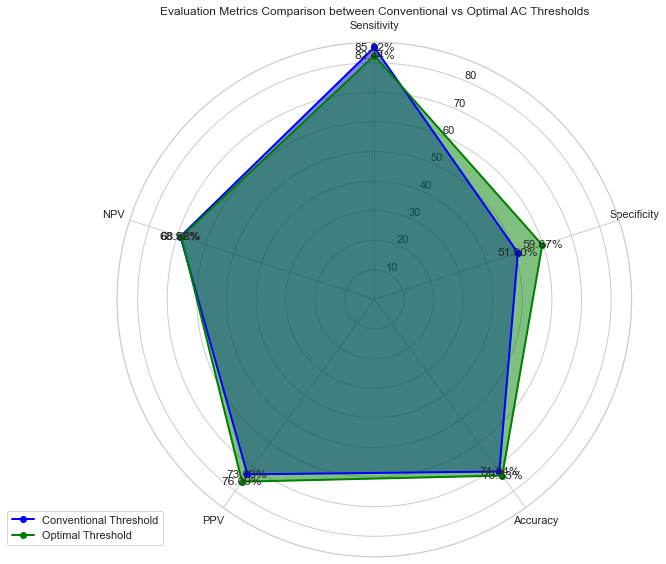

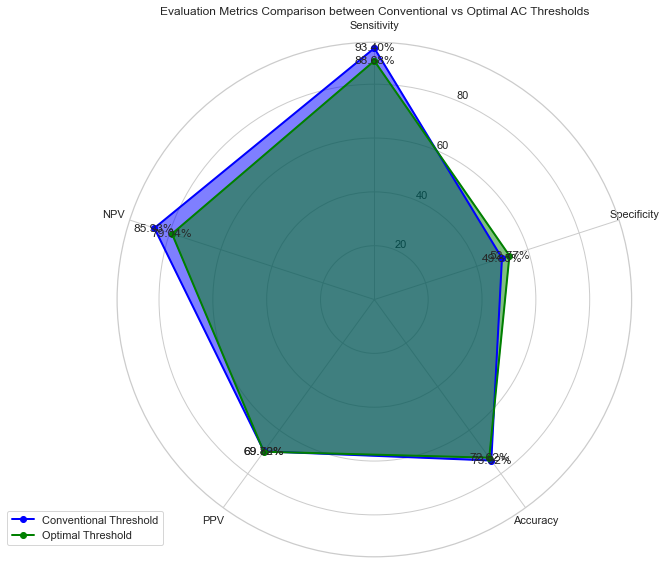

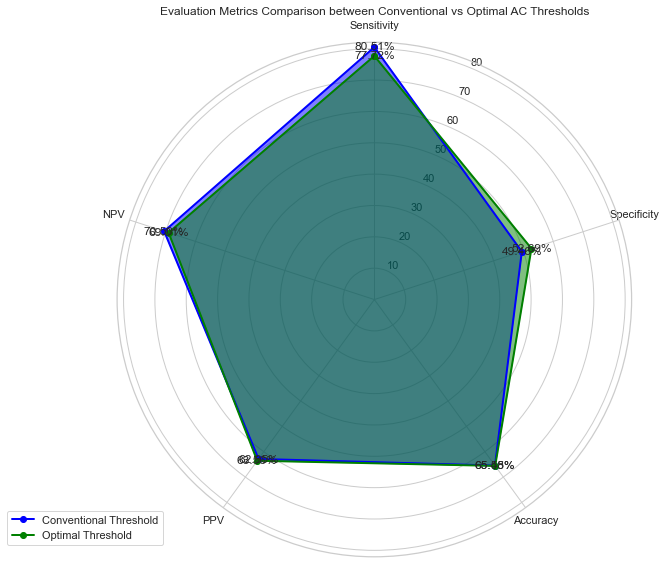

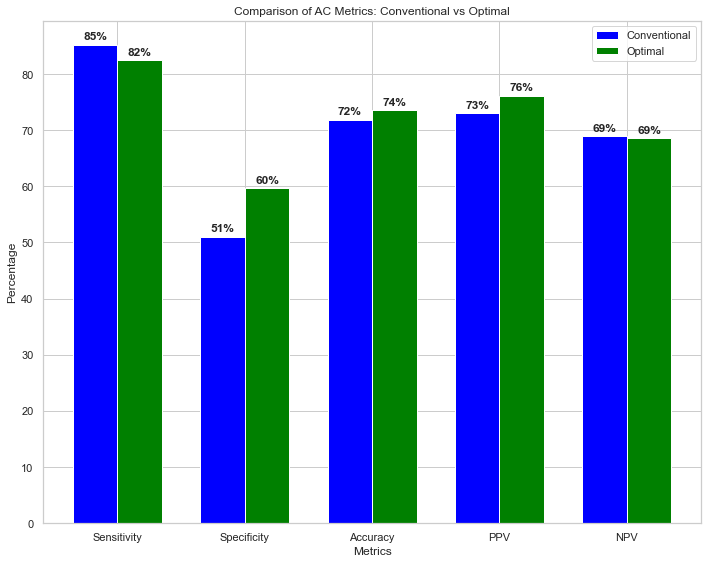

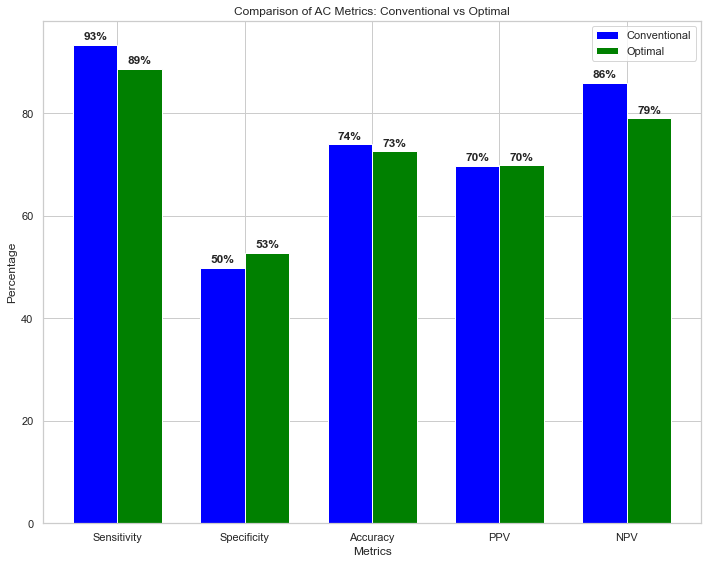

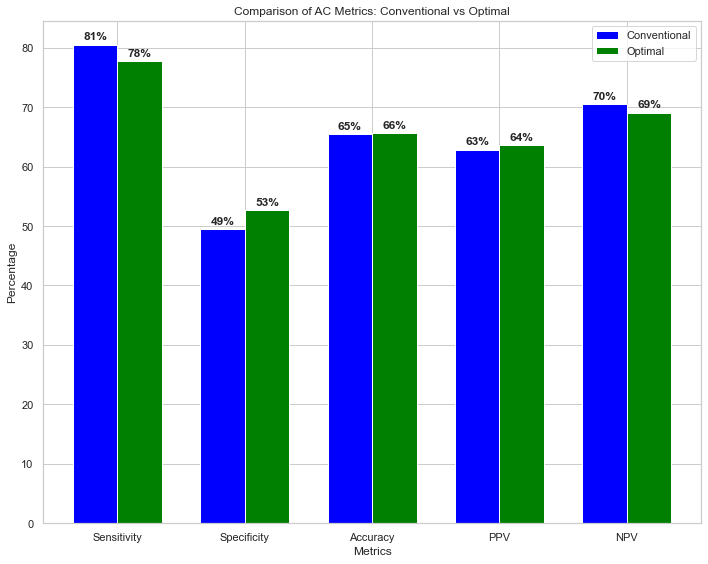

In [56]:
# Test new optimal AC Threshold values on unseen data using the testing participant 
ac_scores, evaluation_metrics_ac = compute_evaluation_metrics_ac(testing_count_brond_ndh, testing_count_brond_dh,
                                testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
                                conventional_threshold_unilateral, optimal_H_AC_NDH, optimal_H_AC_DH)
plot_multiple_radar_plot(evaluation_metrics_ac, None, metric = 'AC')

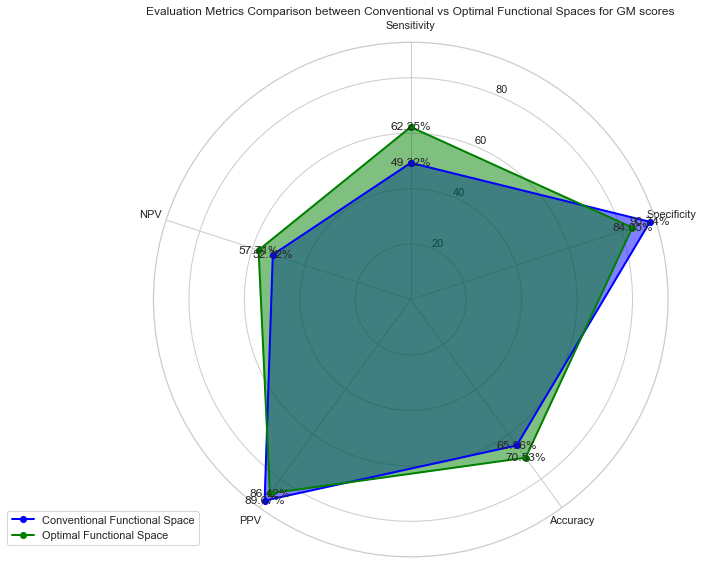

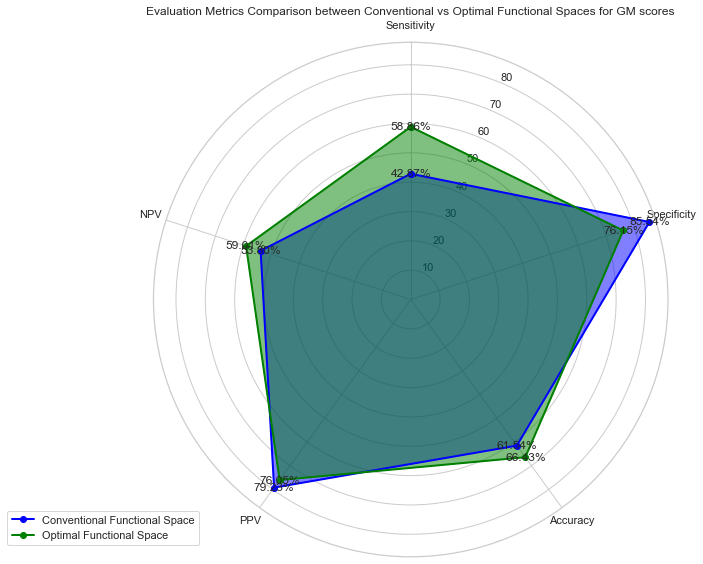

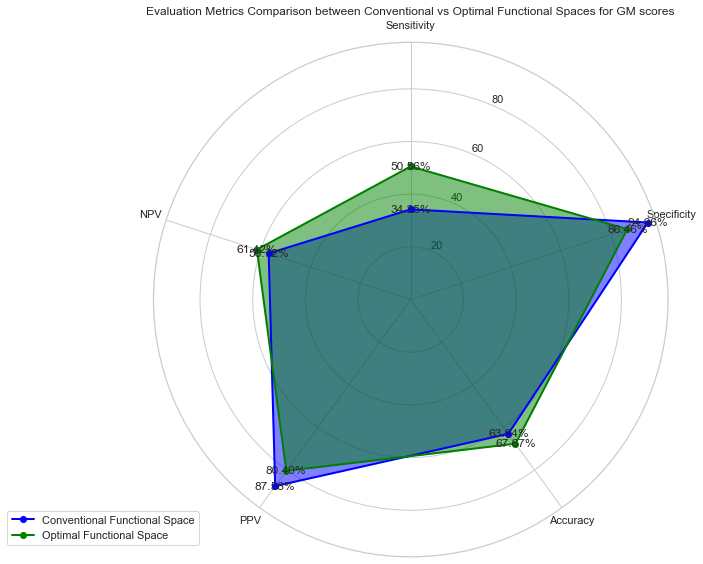

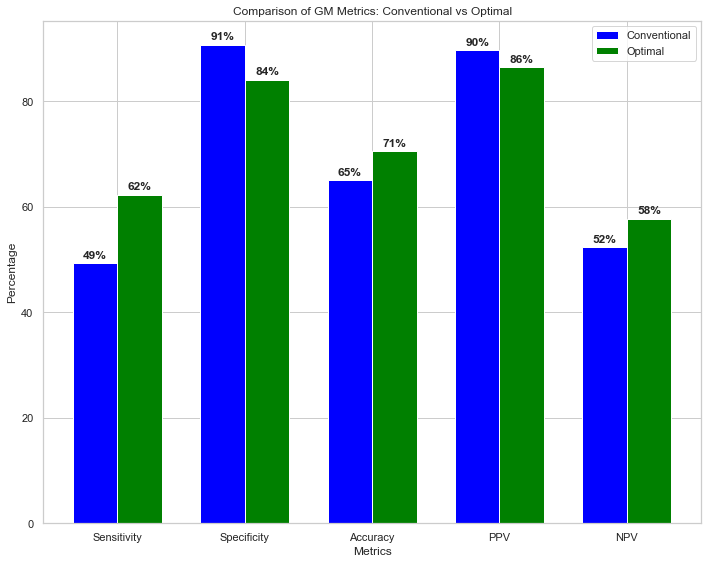

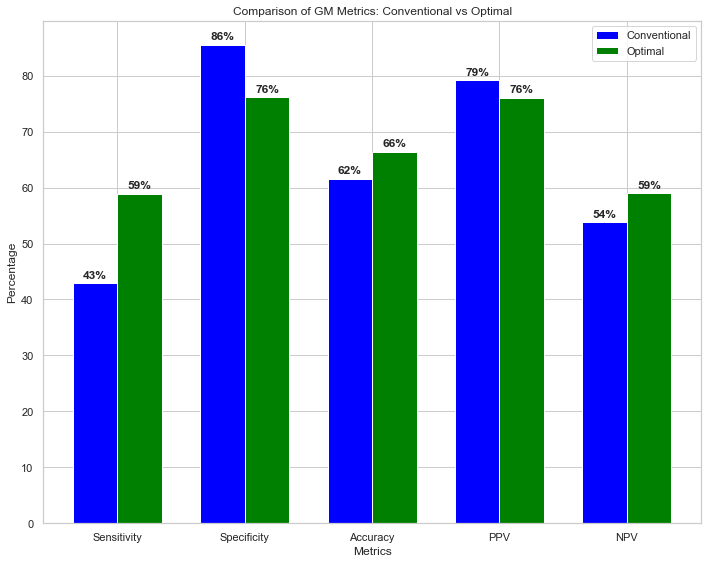

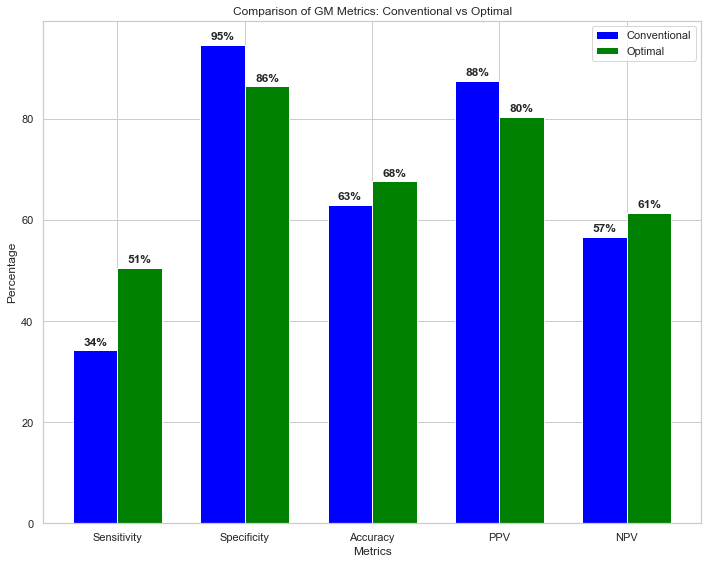

In [57]:
# Test new optimal FS values on unseen data using the testing participant 
gm_scores, eval_metric_gm = compute_evaluation_metrics_gm(testing_pitch_mad_ndh, testing_pitch_mad_dh,
                                  testing_yaw_mad_ndh, testing_yaw_mad_dh,
                                  testing_GT_mask_2Hz_ndh, testing_GT_mask_2Hz_dh, testing_GT_mask_2Hz_bil,
                                  conventional_functional_space, optimal_H_FS_NDH, optimal_H_FS_DH)

# Plot difference between convenitonal and optimal FS for the GM algorithm
plot_multiple_radar_plot(eval_metric_gm, None, metric = 'GM')

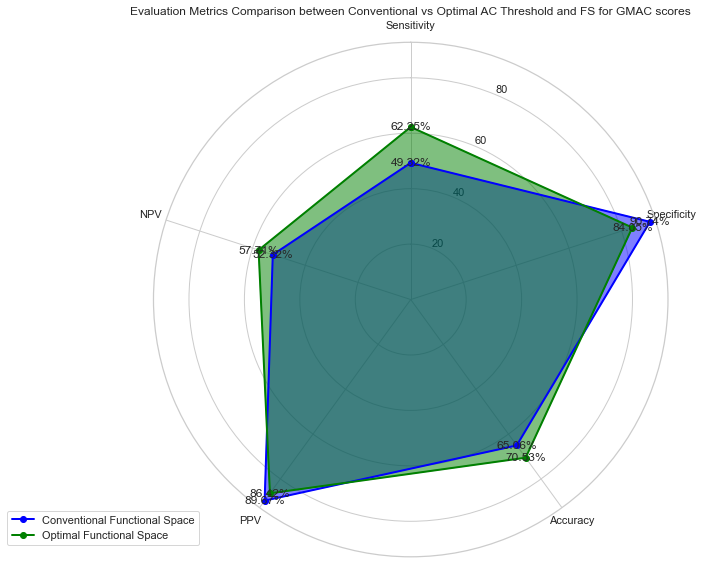

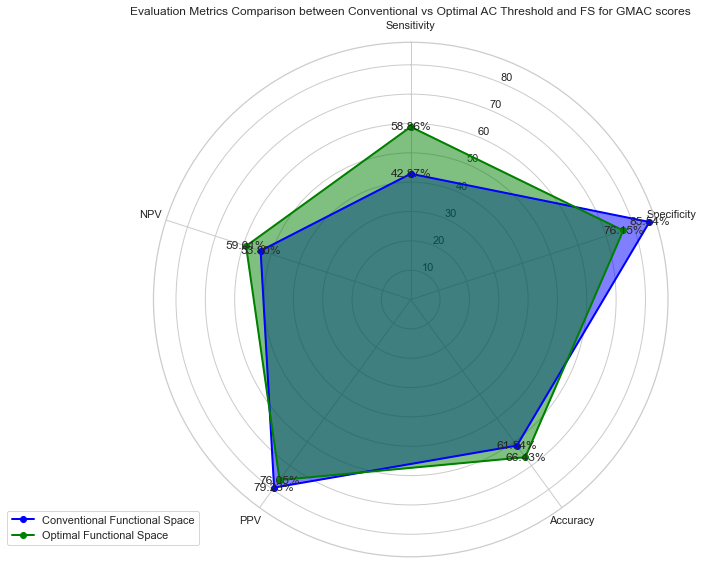

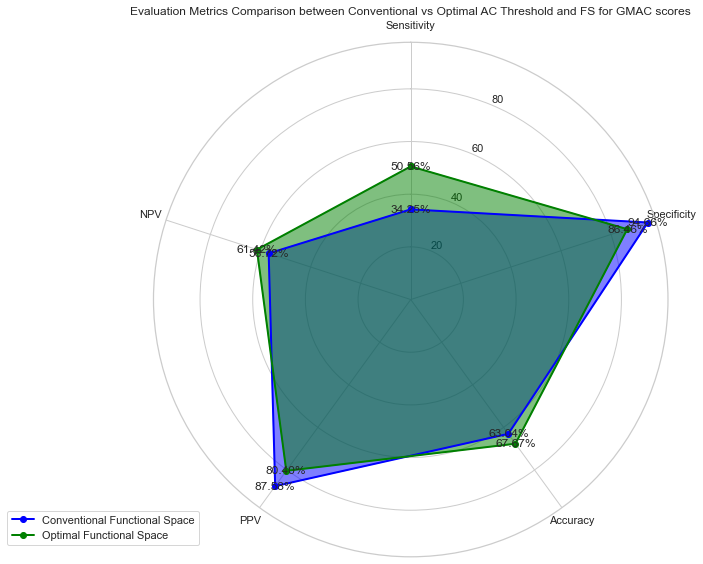

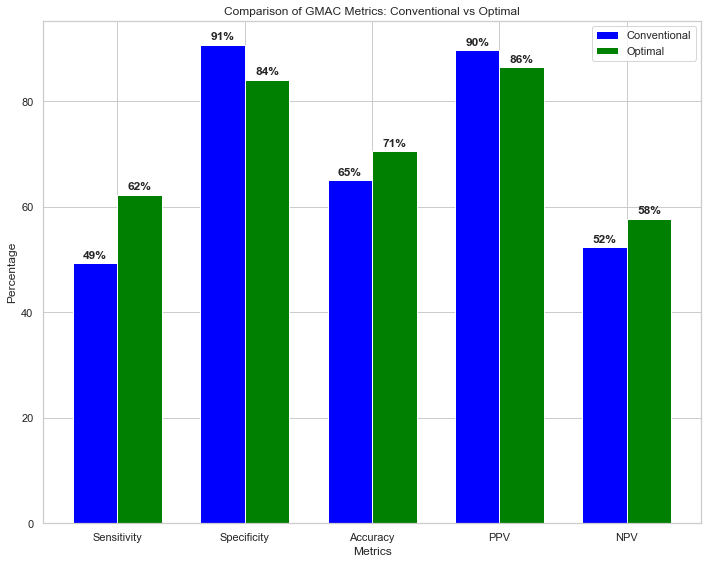

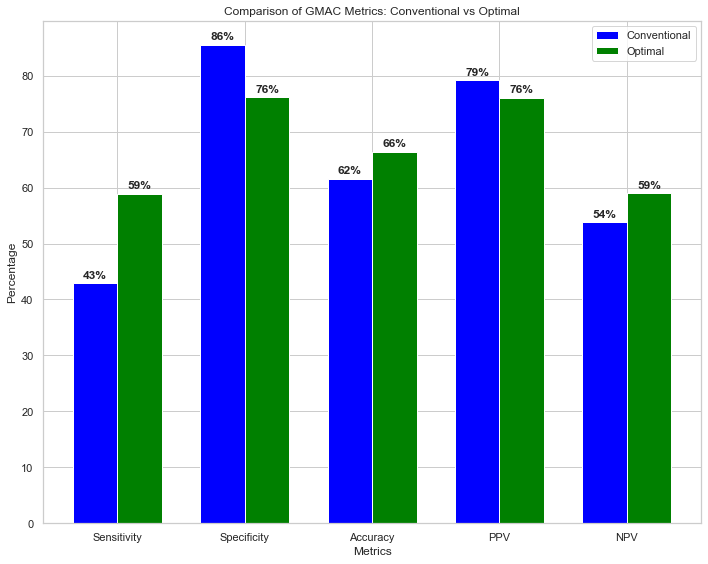

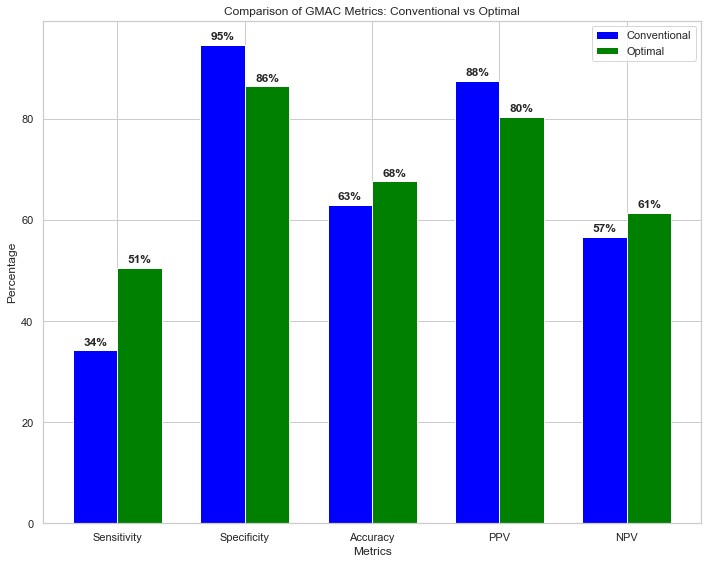

In [58]:
# Evaluating GMAC scores using the testing participant 
gmac_scores, eval_metrics_gmac = compute_evaluation_metrics_gmac(testing_pitch_mad_ndh, testing_pitch_mad_dh,
                                    testing_count_brond_ndh, testing_count_brond_dh,
                                    testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
                                    optimal_H_AC_NDH, optimal_H_AC_DH, optimal_H_FS_NDH, optimal_H_FS_DH)

plot_multiple_radar_plot(eval_metric_gm, None, metric = 'GMAC')

In [59]:
# Compute duration of functional arm use on testing dataset
# Get duration of arm use and corresponding % 
gmac_duration_arm_use = get_duration_functional_arm_use(gmac_scores, sampling_frequency = frequency_gmac)
ac_duration_arm_use = get_duration_functional_arm_use(ac_scores, sampling_frequency = frequency_gmac)
gm_duration_arm_use = get_duration_functional_arm_use(gm_scores, sampling_frequency = frequency_gm)
GT_50Hz_duration_arm_use = get_duration_functional_arm_use(testing_GT_mask_50Hz, sampling_frequency = frequency_GT)

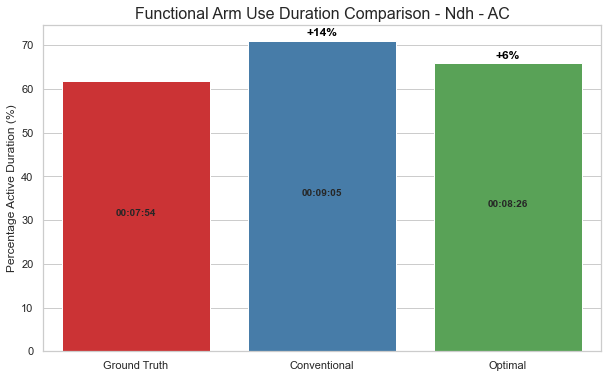

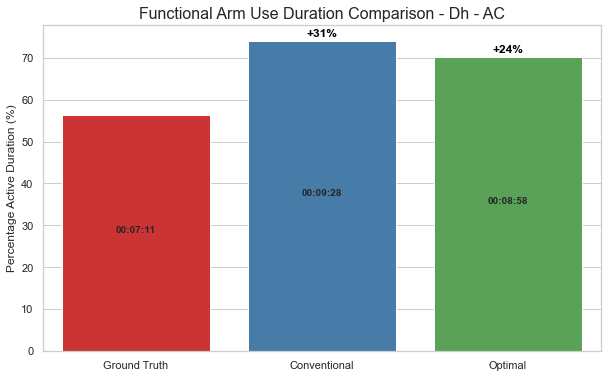

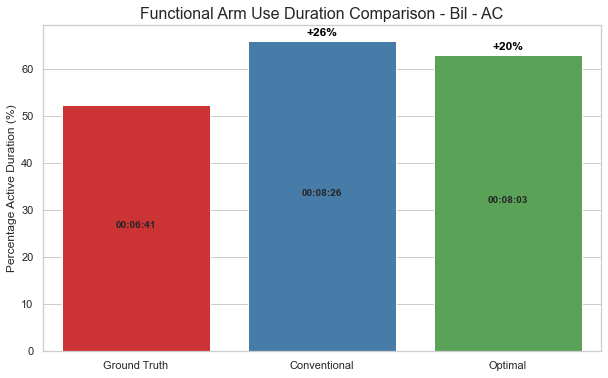

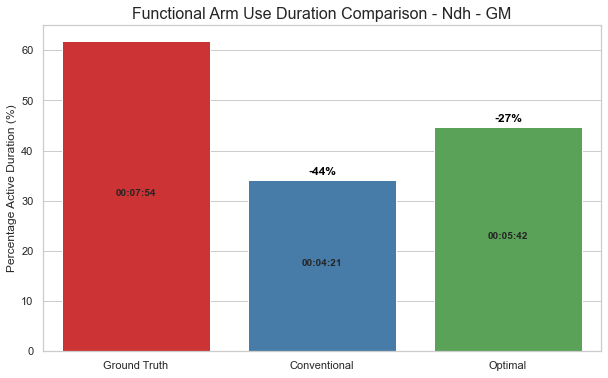

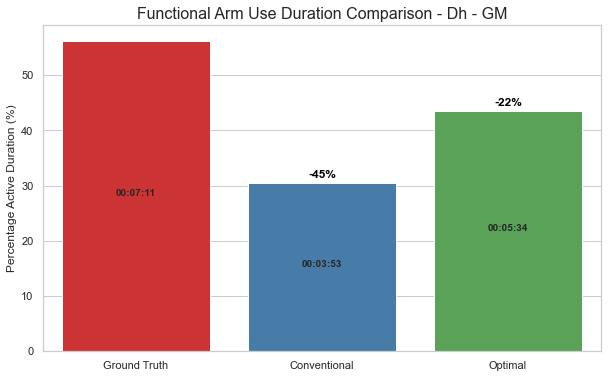

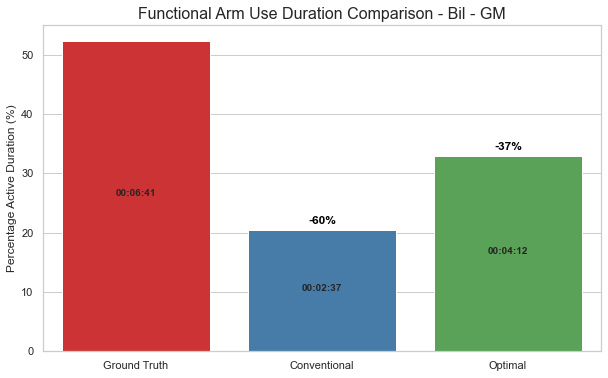

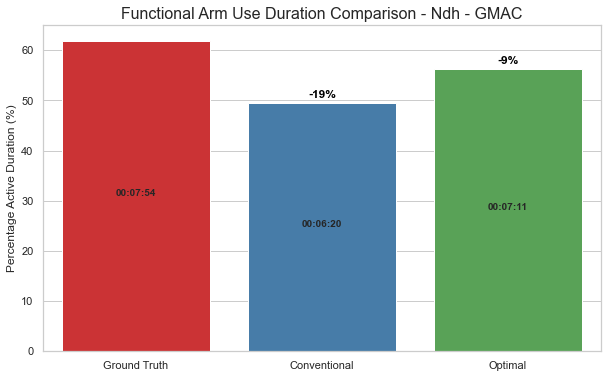

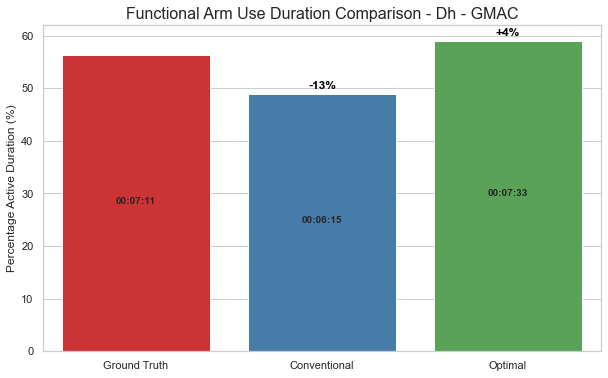

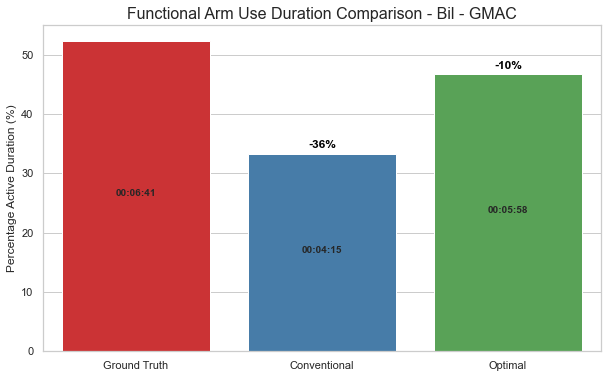

In [60]:
# Plot duration of arm use comparaison 
compare_arm_use_duration_plot(GT_50Hz_duration_arm_use, ac_duration_arm_use, 'AC', save_path = None)
compare_arm_use_duration_plot(GT_50Hz_duration_arm_use, gm_duration_arm_use, 'GM', save_path = None)
compare_arm_use_duration_plot(GT_50Hz_duration_arm_use, gmac_duration_arm_use, 'GMAC', save_path = None)